<a href="https://colab.research.google.com/github/RiteshopShrivastava/Decision_tree/blob/main/Assignment_DecisionTree_Fraud_Check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

**Data Description :**

Undergrad : person is under graduated or not

Marital.Status : marital status of a person

Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 

Work Experience : Work experience of an individual person

Urban : Whether that person belongs to urban area or not


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

In [3]:
fraud_df = pd.read_csv('/content/Fraud_check.csv')
fraud_df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
#Label encoding for categorical data
label_encoder = preprocessing.LabelEncoder()
fraud_df['Undergraduate']= label_encoder.fit_transform (fraud_df['Undergrad'])
fraud_df['Marital_Status'] =label_encoder.fit_transform(fraud_df['Marital.Status'])
fraud_df['is_Urban'] = label_encoder.fit_transform(fraud_df['Urban'])

In [15]:
fraud_df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Undergraduate,Marital_Status,is_Urban
0,NO,Single,68833,50047,10,YES,0,2,1
1,YES,Divorced,33700,134075,18,YES,1,0,1
2,NO,Married,36925,160205,30,YES,0,1,1
3,YES,Single,50190,193264,15,YES,1,2,1
4,NO,Married,81002,27533,28,NO,0,1,0
...,...,...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,1,0,1
596,YES,Divorced,69967,55369,2,YES,1,0,1
597,NO,Divorced,47334,154058,0,YES,0,0,1
598,YES,Married,98592,180083,17,NO,1,1,0


In [16]:
#drop Marital.Status, Undergrad, Urban columns
#fraud_data = fraud_df.drop(['Marital.Status', 'Undergrad','Urban'], axis=1)
#or
fraud_data = pd.concat([fraud_df.iloc[:,2:5], fraud_df.iloc[:,6:]], axis=1)
fraud_data

,Taxable.Income,City.Population,Work.Experience,Undergraduate,Marital_Status,is_Urban
0,68833,50047,10,0,2,1
1,33700,134075,18,1,0,1
2,36925,160205,30,0,1,1
3,50190,193264,15,1,2,1
4,81002,27533,28,0,1,0
...,...,...,...,...,...,...
595,76340,39492,7,1,0,1
596,69967,55369,2,1,0,1
597,47334,154058,0,0,0,1
598,98592,180083,17,1,1,0


In [18]:
tax_value =[]
for value in fraud_data['Taxable.Income'] :
  if value <=30000:
    tax_value.append('Risky')
  else :
      tax_value.append('Good')
fraud_data['tax_value']= tax_value

In [19]:
fraud_data

,Taxable.Income,City.Population,Work.Experience,Undergraduate,Marital_Status,is_Urban,tax_value
0,68833,50047,10,0,2,1,Good
1,33700,134075,18,1,0,1,Good
2,36925,160205,30,0,1,1,Good
3,50190,193264,15,1,2,1,Good
4,81002,27533,28,0,1,0,Good
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,1,Good
596,69967,55369,2,1,0,1,Good
597,47334,154058,0,0,0,1,Good
598,98592,180083,17,1,1,0,Good


In [25]:
fraud_data1= fraud_data.drop(['Taxable.Income'], axis=1)

In [26]:
fraud_data1

,City.Population,Work.Experience,Undergraduate,Marital_Status,is_Urban,tax_value
0,50047,10,0,2,1,Good
1,134075,18,1,0,1,Good
2,160205,30,0,1,1,Good
3,193264,15,1,2,1,Good
4,27533,28,0,1,0,Good
...,...,...,...,...,...,...
595,39492,7,1,0,1,Good
596,55369,2,1,0,1,Good
597,154058,0,0,0,1,Good
598,180083,17,1,1,0,Good


In [27]:
x= fraud_data1.iloc[:,0:5]
y= fraud_data1.iloc[:,5:]

In [28]:
x

,City.Population,Work.Experience,Undergraduate,Marital_Status,is_Urban
0,50047,10,0,2,1
1,134075,18,1,0,1
2,160205,30,0,1,1
3,193264,15,1,2,1
4,27533,28,0,1,0
...,...,...,...,...,...
595,39492,7,1,0,1
596,55369,2,1,0,1
597,154058,0,0,0,1
598,180083,17,1,1,0


In [29]:
y

,tax_value
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
595,Good
596,Good
597,Good
598,Good


In [30]:
fraud_data1['tax_value'].unique()

array(['Good', 'Risky'], dtype=object)

In [31]:
fraud_data1.tax_value.value_counts()

Good     476
Risky    124
Name: tax_value, dtype: int64

In [32]:
x_train, x_test, y_train,y_test= train_test_split(x,y, test_size=0.3, random_state=40)

In [33]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

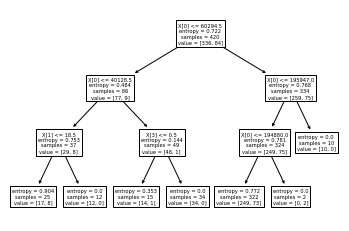

In [37]:
tree.plot_tree(model);